**Question 1.** Ecrire la vraisemblance $\mathcal{L}(\beta)$ du modèle.

On a par hypothèse que: $X|Y \hookrightarrow \mathcal{B}(\pi(X))$.

La vraisemblance de $n$ variables aléatoires de Bernoulli peut donc être exprimée ainsi: 

$$\mathcal{L}(\beta) = \prod\limits_{i=1}^n \mathbb{P}(Y=y_i | X = \bm{x}_i) = \prod\limits_{i=1}^n \pi(\bm{x}_i)^{y_i}(1-\pi(\bm{x}_i))^{1-y_i}$$

**Question 2.** Montrer que l'estimateur du maximum de vraisemblance peut s'obtenir en considérant l'algorithme itératif suivant:

$$\beta^{(s+1)} = \beta^{(s)} + (X^TV^{(s)}X)^{-1}X^T(\bm{y}-\bm{\pi}^{(s)})$$

où:

- $X$ est la matrice formée d’une première colonne de coordonnées constantes
égales à 1 et des $p$ colonnes correspondant aux variables $X_1, ...,X_p$ observées sur les $n$ individus.
- $\bm{y} = (y_1 ... y_n)^T$ ets le vecteur colonne de labels associés à chaque $x_i$
- $\bm{\pi}^{(s)}$ est le vecteur formé des $\pi_i = \pi(x_i)$ estimé à l'itération courante $s$.
- $V^{(s)}$ est la matrice diagonale formée des $\pi^{(s)}(1 - \pi^{(s)})$.

Avec la question précédente, on obtient la log-vraisemblance:

$$\mathcal{l}(\beta) = \sum_{i=1}^n y_i \log(\pi(\bm{x_i})) + (1 - y_i) \log(1 - \pi(\bm{x_i}))$$ 

i.e.
$$\mathcal{l}(\beta) = \sum_{i=1}^n y_i (\bm{x_i}^T\beta - \log(1 + e^{\bm{x_i}^T\beta})) - (1 - y_i) \log(1 + e^{\bm{x_i}^T\beta})$$

Ainsi:

$$\mathcal{l}(\beta) = \sum\limits_{i=1}^n y_i \bm{x}_i^T\beta - \log(1+e^{\bm{x}_i^T\beta })$$

En prenant le gradient selon $\beta$:

$$\nabla_\beta \mathcal{l}(\beta) = \sum\limits_{i=1}^n y_i\bm{x}_i - \frac{\bm{x_i}e^{\bm{x}_i^T \beta}}{1 + e^{\bm{x}_i^T \beta}} = \sum\limits_{i=1}^n (y_i-\pi(\bm{x}_i))\bm{x_i} = X^T(\bm{y} - \bm{\pi})$$



On en déduit la hessienne de la log-vraisemblance:

$$\forall j \in [\![1, p]\!], \nabla_\beta (\nabla_\beta l(\beta)_j) = \nabla_\beta \sum\limits_{i=1}^n [y_i - \pi(x_i)]x_{ij} = \sum\limits_{i=1}^n \nabla_\beta [y_i - \pi(x_i)]x_{ij} = - \sum\limits_{i=1}^n \nabla_\beta  [\pi(x_i)x_{ij}]$$

i.e.

$$\forall j \in [\![1, p]\!], \nabla_\beta (\nabla_\beta l(\beta)_j) = -\sum\limits_{i=1}^n \nabla_\beta \left[\frac{1}{1 + e^{-\bm{x}_i^T\beta}} \right] x_{ij} = -\sum\limits_{i=1}^n \left[\frac{1}{1 + e^{-\bm{x}_i^T\beta}} \right]^2 x_{ij} e^{-\bm{x}_i^T\beta} \bm{x}_i $$

D'où:

$$\forall j \in [\![1, p]\!], \nabla_\beta (\nabla_\beta l(\beta)_j) = -\sum\limits_{i=1}^n \left[\frac{e^{-\bm{x}_i^T\beta}}{1 + e^{-\bm{x}_i^T\beta}} \right] \left[\frac{1}{1 + e^{-\bm{x}_i^T\beta}} \right] x_{ij} \bm{x}_i = -\sum\limits_{i=1}^n [1 - \pi(x_i)]\pi(x_i) x_{ij} \bm{x}_i$$

Ainsi:

$$\nabla_\beta (\nabla_\beta l(\beta)) = -\sum\limits_{i=1}^n [1 - \pi(x_i)]\pi(x_i) \bm{x}_i \bm{x}_i^T = -X^TVX$$

avec:

$$V=\text{diag}((\pi(x_i)[1 - \pi(x_i)])_{1\leq i\leq n})$$

On se place à l'étape $s$ de notre algorithme.
Le développement en série de Taylor de $\mathcal{l}(\beta)$ à l'ordre 2 en un point proche de $\beta^{(s)}$ s'écrit:

$$\mathcal{l}(\beta) = \mathcal{l}(\beta^{(s)}) + \nabla_\beta\mathcal{l}(\beta^{(s)})^T(\beta - \beta^{(s)}) + \frac{1}{2}(\beta - \beta^{(s)})^T\nabla_\beta (\nabla_\beta l(\beta^{(s)}))(\beta - \beta^{(s)}) + o(\lVert \beta - \beta^{(s)}\rVert^2)$$

Dans la suite, on ignore le terme négligeable de l'expression ci-dessus. Afin de maximiser la log-vraisemblance, on choisit un $\beta^{(s+1)}$ qui maximise cette approximation.

Pour se faire, on dérive $\mathcal{l}(\beta)$ selon $\beta$, et on regarde quand la dérivée s'annule. On obtient alors la relation suivante:

$$\nabla_\beta\mathcal{l}(\beta^{(s)}) + \nabla_\beta (\nabla_\beta l(\beta^{(s)}))(\beta^{(s+1)} - \beta^{(s)}) = 0$$

On obtient donc la relation suivante entre $\beta^{(s)}$ et $\beta^{(s+1)}$:

$$\beta^{(s+1)} = \beta^{(s)} - \nabla_\beta (\nabla_\beta l(\beta^{(s)}))^{-1}\nabla_\beta\mathcal{l}(\beta^{(s)})$$

En replaçant l'expression de la hessienne et du gradient dans cette expression avec leur formes matricielles identifiées plus haut, on obtient:

$$\beta^{(s+1)} = \beta^{(s)} + (X^TV^{(s)}X)^{-1}X^T(\bm{y} - \bm{\pi}^{(s)})$$

**Question 3.** En remarquant que $\pi_i(1 - \pi_i)$ est majoré par $\frac{1}{4}$, proposer une approximation $H_2$ de $H_1$ telle que $H_1 - H_2$ soit définie positive.

Comme le fait remarquer l'énoncé,

$$f: x \mapsto x(1-x)$$

admet un maximum sur $[0, 1]$ en $\frac{1}{2}$, et y prend la valeur $\frac{1}{4}$. On a alors:

$$ \forall x \in [0, 1], f(x) \le \frac{1}{4}$$

En particulier, 

$$\forall s \in \mathbb{N}, \forall i \in [\![1, n]\!], \pi_i^{(s)}(1-\pi_i^{(s)}) \le \frac{1}{4}$$

Soit $\varepsilon > 0$ fixé. Considérons la matrice:

$$H_2 = -(\frac{1}{4} + \varepsilon)X^TX$$

Soit $v \in \mathbb{R}^p \setminus \{0\}$ fixé quelconque. On a:

$$v^T(H_1 - H_2)v = (Xv)^T((\frac{1}{4} + \varepsilon)I_n - V^{(s)})(Xv) = \sum_{i=1}^n ((\frac{1}{4} + \varepsilon) - \pi_i^{(s)}(1-\pi_i^{(s)})) (Xv)_j^2 \ge \varepsilon \lVert Xv \rVert_2^2 > 0$$

sous l'hypothèse que $X$ est injective.

Avec ce choix de $H_2$, on a bien $H_1 - H_2$ définie positive.

**Question 4.** Réécrire l'algorithme itératif en y injectant cette approximation

Avec le choix de $H_2$ ci-dessus, et en prenant $\varepsilon$ suffisamment petit, on peut réécrire l'algorithme obtenu à la question 2 sous la forme suivante:

$$\beta^{(s+1)} =  \beta^{(s)} + 4(X^TX)^{-1}X^T(\bm{y} - \bm{\pi^{(s)}})$$

où nous sommes passés à la limite lorsque $\varepsilon \rightarrow 0$.

**Question 5.** Discuter l'intérêt de considérer la maximisation de la vraisemblance pénalisée.

Il s'agit d'un terme de pénalité qui resemble à la pénalité Ridge, avec une norme $\mathcal{l}_2$. Ceci a pour effet de faire du shrinkage sur la solution obtenue, à savoir borner les coefficients du $\beta$ maximisant la vraisemblance.

De plus, le $\lambda$, si bien choisi, permet de contourner des problèmes d'inversibilité de la matrice $X^TX$ en ajoutant un terme en $\lambda I_p$. Ces problèmes d'inversibilité surviennent notamment lorsque:
- Les colonnes de X sont liées (certaines variables explicatives sont corrélées)
- Lorsque l'on a plus de variables explicatives que d'observations en grande dimension ($n < p$), car $rang(X^TX) \le n$

- En grande dimension, pour peu d'observations, le terme rend la matrice définie positive.

**Question 6.** Montrer que la maximisation de la vraisemblance pénalisée peut s'obtenir en considérant l'algorithme suivant:

$$\beta_{\lambda}^{(s+1)} = \beta_{\lambda}^{(s)} + 4(X^TX + 4\lambda I_p)^{-1}(X^T(\bm{y} - \bm{\pi}) - \lambda\beta_{\lambda}^{(s)})$$

Par définition, l'expression de la vraisemblance pénalisée s'exprime:

$$\mathcal{L}_{\lambda}(\beta) = \mathcal{L}(\beta) - \frac{\lambda}{2}\lVert \beta \rVert_2^2$$

Or maximiser cette expression revient à maximiser:

$$\mathcal{l}_{\lambda}(\beta) = \mathcal{l}(\beta) - \frac{\lambda}{2}\lVert \beta \rVert_2^2$$

On en déduit des expressions obtenues à la question 2 pour le gradient et la hessienne de $\mathcal{l}(\beta)$ celles de $\mathcal{l}_{\lambda}(\beta)$:

$$\nabla_\beta\mathcal{l}_{\lambda}(\beta) = \nabla_\beta\mathcal{l}(\beta) - \frac{\lambda}{2} \nabla_\beta(\lVert \beta \rVert_2^2) = X^T(\bm{y} - \bm{\pi}) - \lambda\beta$$

et:

$$\nabla_\beta (\nabla_\beta l_{\lambda}(\beta)) = -X^TVX -\lambda I_p$$

En se plaçant à l'étape $s$, et en effectuant un développement de Taylor à l'ordre 2 comme à la question 2 en un $\beta$ proche de $\beta_{\lambda}^{(s)}$, on obtient:

$$\mathcal{l}_{\lambda}(\beta) = \mathcal{l}_{\lambda}(\beta_{\lambda}^{(s)}) + \nabla_\beta\mathcal{l}_{\lambda}(\beta^{(s)})^T(\beta - \beta^{(s)}) + \frac{1}{2}(\beta - \beta^{(s)})^T\nabla_\beta (\nabla_\beta \mathcal{l}_{\lambda}(\beta^{(s)}))(\beta - \beta^{(s)}) + o(\lVert \beta - \beta^{(s)}\rVert^2)$$

Dans la suite, on ignore le terme négligeable de l'expression ci-dessus. Afin de maximiser la log-vraisemblance, on choisit un $\beta_{\lambda}^{(s+1)}$ qui maximise cette approximation.

Pour se faire, on dérive $\mathcal{l}_{\lambda}(\beta)$ selon $\beta$, et on regarde quand la dérivée s'annule. On obtient alors la relation suivante:

$$\nabla_\beta\mathcal{l}_{\lambda}(\beta_{\lambda}^{(s)}) + \nabla_\beta (\nabla_\beta l_{\lambda}(\beta_{\lambda}^{(s)}))(\beta_{\lambda}^{(s+1)} - \beta_{\lambda}^{(s)}) = 0$$

et donc:

$$\beta_{\lambda}^{(s+1)} = \beta_{\lambda}^{(s)} - \nabla_\beta (\nabla_\beta l_{\lambda}(\beta_{\lambda}^{(s)}))^{-1}\nabla_\beta\mathcal{l}_{\lambda}(\beta_{\lambda}^{(s)})$$


En remplaçant les expressions du gradient et de la hessienne de $\mathcal{l}_{\lambda}(\beta)$ obtenues ci-dessus, on obtient alors:

$$\beta_{\lambda}^{(s+1)} = \beta_{\lambda}^{(s)} + (X^TV^{(s)}X + \lambda I_p)^{-1}(X^T(\bm{y} - \bm{\pi}) - \lambda \beta_{\lambda}^{(s)})$$

En approximant $X^TV^{(s)}X$ par la matrice $H_2$ obtenue à la question 3, on obtient:

$$\beta_{\lambda}^{(s+1)} = \beta_{\lambda}^{(s)} + (\frac{1}{4}X^TX + \lambda I_p)^{-1}(X^T(\bm{y} - \bm{\pi}) - \lambda \beta_{\lambda}^{(s)})$$

i.e.

$$\beta_{\lambda}^{(s+1)} = \beta_{\lambda}^{(s)} + 4(X^TX + 4\lambda I_p)^{-1}(X^T(\bm{y} - \bm{\pi}) - \lambda \beta_{\lambda}^{(s)})$$

ce qui correspond à l'expression voulue.

**Question 7.** Montrer que la maximisation de la vraisemblance pénalisée revient à résoudre le problème d'optimisation suivant:

$$\min\limits_{\beta\in\mathbb{R}^p} \sum_{i=1}^{n} \log(1 + e^{- \overline y_i \beta^Tx_i}) + \frac{\lambda}{2}\lVert \beta \rVert_2^2$$

où $\overline y_i$ est la variable encodée en $\{ -1, 1\}$.

Maximiser $\mathcal{l}_{\lambda}(\beta)$  équivaut à minimiser $-\mathcal{l}_{\lambda}(\beta)$ pour $\beta\in\mathbb{R}^p$. Or:

$$-\mathcal{l}_{\lambda}(\beta) = \sum\limits_{i=1}^n (\log(1+e^{\beta^T \bm{x}_i}) - y_i\beta^T \bm{x}_i) + \frac{\lambda}{2}\|\beta\|_2^2 = \sum\limits_{i=1}^n \log(e^{-y_i\beta^Tx_i}(1+e^{\beta^T \bm{x}_i})) + \frac{\lambda}{2}\|\beta\|_2^2$$

D'où:

$$-\mathcal{l}_{\lambda}(\beta) = \sum\limits_{i=1}^n \log(e^{-y_i\beta^Tx_i}+e^{(1-y_i)\beta^T \bm{x}_i}) + \frac{\lambda}{2}\|\beta\|_2^2$$


On définit la variable $\overline y_i = 2 y_i - 1\in\{-1,1\}$ et on remarque que:

$$\begin{cases}
\log(e^{-y_i\beta^Tx_i}+e^{(1-y_i)\beta^T \bm{x}_i}) = \log(1+e^{\beta^T \bm{x}_i}) & y_i = 0 & \overline y_i = -1\\
\log(e^{-y_i\beta^Tx_i}+e^{(1-y_i)\beta^T \bm{x}_i}) = \log(1+e^{-\beta^T \bm{x}_i}) & y_i = 1 & \overline y_i = 1\\
\end{cases}$$

Ainsi:

$$\forall i \in [\![1, n]\!], \log(e^{-y_i\beta^Tx_i}+e^{(1-y_i)\beta^T \bm{x}_i}) = \log(1+e^{-\overline y_i\beta^T \bm{x}_i})$$

D'où:

$$-\mathcal{l}_{\lambda}(\beta) = \sum\limits_{i=1}^n \log(1+e^{-\overline y_i\beta^T \bm{x}_i}) + \frac{\lambda}{2}\|\beta\|_2^2$$

La maximisation de $\mathcal{l}_{\lambda}(\beta)$ pour $\beta\in\mathbb{R}^p$ revient donc à déterminer:

$$\min\limits_{\beta\in\mathbb{R}^p}\sum\limits_{i=1}^n \log(1+e^{-\overline y_i\beta^T \bm{x}_i}) + \frac{\lambda}{2}\|\beta\|_2^2$$

**Question 8.**

Considérons:

$$l(z) = \log(1+\exp(-z))$$

Nous pouvons reformuler le problème d'optimisation de la question précédente sous les contraintes $\\ \forall i \in [\![1, n]\!], \overline y_i \beta^Tx_i  = z_i$

Le lagrangien s'exprime donc:

$$\mathcal{L}(\beta, \alpha) = \sum\limits_{i=1}^n l(\overline y_i \beta^Tx_i) + \frac{\lambda}{2}\|\beta\|_2^2 + \sum\limits_{i=1}^n\alpha_i(\overline y_i\beta^Tx_i - z_i)$$

Or on a:

$$l^*(z) = \sup\limits_{x \in \mathbb{R}}(zx - \log(1+\exp(-x)))$$

Le maximum est atteint pour $-z = \frac{1}{1 + e^{-(-x)}} = \sigma(-x)$, et donc en $x = - \log(\frac{-z}{1 + z})$. Ainsi, on a:

$$l^*(z) = -z\log(\frac{-z}{1+z}) - \log(1 + e^{-(-\log(\frac{-z}{1+z}))}) = -z\log(-z) + z\log(1+z) - \log(1 + \frac{-z}{1+z} )$$

D'où:

$$l^*(z) = -z\log(-z) + z\log(1+z) + \log(1+z) = -z\log(-z) + (1+z)\log(1+z)$$

En notant $g(x) = \frac{\lambda}{2}\|x\|_2^2$, on a:

$$g^*(x) = \frac{1}{2\lambda}\|\beta\|_2^2$$


Ainsi, puisque notre problème initial s'écrit:

$$\min\limits_{\beta\in\mathbb{R}^p}\sum\limits_{i=1}^n l(\overline y_i\beta^T \bm{x}_i) + g(\beta)$$

son dual s'écrit:

$$\max\limits_{\alpha \in \mathbb{R}^n}\sum\limits_{i=1}^n -l^*(\alpha_i) - g^*(-\text{diag}(\overline y)X^T \alpha)$$

i.e:

$$\max\limits_{\alpha\in\mathbb{R}^n}\sum\limits_{i=1}^n -\alpha_i\log(\alpha_i) - \left(1-\alpha_i\right)\log\left(1-\alpha_i\right) - \frac{1}{2\lambda}\alpha^T\text{diag}(\overline y)X X^T\text{diag}(\overline y)\alpha$$

On notera:

$$K:=\text{diag}(\overline y)X X^T\text{diag}(\overline y)$$

Et:

$$\mathcal{D}(\alpha) = \sum\limits_{i=1}^n -\alpha_i\log(\alpha_i) - \left(1-\alpha_i\right)\log\left(1-\alpha_i\right) - \frac{1}{2\lambda}\alpha^TK\alpha$$

On en déduit l'expression du gradient et de la hessienne:

$$\nabla_{\alpha} \mathcal{D}(\alpha)=-\text{logit}(\alpha) - \frac{1}{\lambda}K\alpha$$

et:

$$\nabla\nabla_\alpha \mathcal{D}(\alpha) = - \text{diag}\left(\frac{1}{\alpha(1-\alpha)}\right) - \frac{1}{\lambda}K\simeq - 4I_n - \frac{1}{\lambda}K$$


D'où:
$$\alpha^{(s+1)} = \alpha^{(s)} + \text{diag}(\overline y)(4\lambda I_n - XX^T)^{-1}(\lambda\text{diag}(\overline y)\text{logit}(\alpha) + X X^T\text{diag}(\overline y)\alpha)$$

# Pratical part

In [26]:
from sklearn.model_selection import (
    train_test_split,
    validation_curve,
    cross_val_predict,
)

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    log_loss,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

alzheimer_df = pd.read_table("Alzheimer_Webster.txt", header=0, sep=" ")
test_size = 0.2
target = "Y"

## Question 9.
 À l’aide du logiciel de votre choix, mettre en oeuvre la régression logistique régularisée sur le jeux de données Alzheimer. Si vous utiliser R,
vous pouvez par exemple utiliser le package glmnet.

In [7]:
X = alzheimer_df.drop(target, axis=1)
y = alzheimer_df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=1
)

In [17]:
def regularized_log_regression(penalty="l2"):
    model = LogisticRegression(penalty=penalty, max_iter=500)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)

    print(f"Train log loss: {log_loss(y_train, y_pred)}")
    train_accuracy = accuracy_score(y_train, y_pred)
    print(f"Train accuracy: {round(train_accuracy, 2)}")

    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy: {round(test_accuracy, 2)}")
    return model, accuracy, y_pred


model, accuracy, y_pred = regularized_log_regression()

Train log loss: 2.220446049250313e-16
Train accuracy: 1.0
Test accuracy: 0.82


# Question 10 
Dans une boucle de validation croisée, entraîner une régression
logistique régularisée. Tracer l’évolution du taux d’erreur de classification crossvalidé en fonction des hyper-paramètres du modèle.

In [18]:
Cs = np.logspace(-2.3, 2.3, 10)

fold = 5

In [19]:
def fit_C(C, kernel, dataset, target, fold, penalty="l2"):

    model = LogisticRegression(penalty=penalty, max_iter=1000, solver="liblinear")

    # Use a validation curve to evaluate the impact of C on a specific interval
    train_scores, test_scores = validation_curve(
        estimator=model,
        X=dataset.drop(columns=[target]),
        y=dataset[target],
        param_name="C",
        param_range=C,
        cv=fold,
        n_jobs=-1,
    )

    # Save the different results in a recap dataframe
    params_df = pd.DataFrame()
    params_df["train score"] = train_scores.mean(axis=1)
    params_df["test score"] = test_scores.mean(axis=1)
    params_df["C"] = C
    params_df["kernel"] = kernel
    return params_df

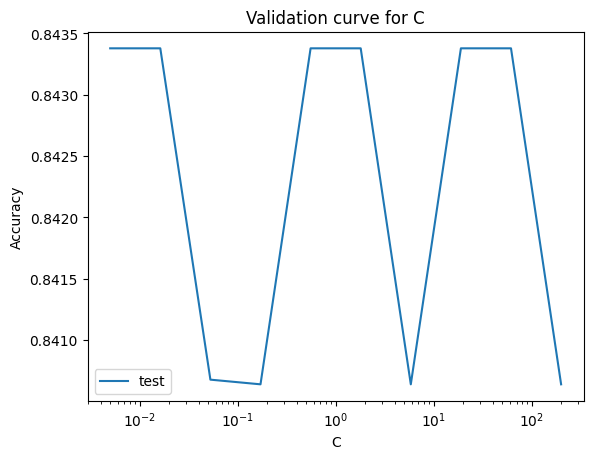

best C: 0.005011872336272725
Test accuracy associated with C: 0.8433789954337898


In [24]:
def plot_accuracy_C(Cs, fold, penalty):
    # Compute for different C the models.
    result_df = pd.DataFrame()
    result_df = pd.concat(
        [
            result_df,
            (
                fit_C(
                    Cs,
                    "linear",
                    dataset=alzheimer_df,
                    target=target,
                    fold=5,
                    penalty=penalty,
                )
            ),
        ]
    )

    sns.lineplot(data=result_df, x="C", y="test score", label="test")
    plt.xscale("log")
    plt.title("Validation curve for C")
    plt.ylabel("Accuracy")
    plt.show()
    # find the best where the test score is the highest
    best_C = result_df[result_df["test score"] == result_df["test score"].max()][
        "C"
    ].values[0]
    print("best C:", best_C)
    print("Test accuracy associated with C:", result_df["test score"].max())
    return best_C


best_C = plot_accuracy_C(Cs, fold, penalty="l2")

## Interpretation
- We found the best parameter in our case to be $C= 0.05$ but more values of $C$ could work as we see that the accuracy is pretty much constant over the whole set 
- Regarding the Accuracy with the TP 1, it is on the test set almost the same as with the linear regression (more or less 0.85). However the train set has an accuracy of 1.0


# Question 11
Reporter des indicateurs qui vous permettent de quantifier la
qualité du modèle optimal.

## interpretation
Suivant le cours, nous choisissons les indicateurs suivants : 
    -  Confusion Matrix 
    -  Accuracy
    - courbe ROC

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       188
           1       0.83      0.84      0.84       176

    accuracy                           0.84       364
   macro avg       0.84      0.84      0.84       364
weighted avg       0.84      0.84      0.84       364



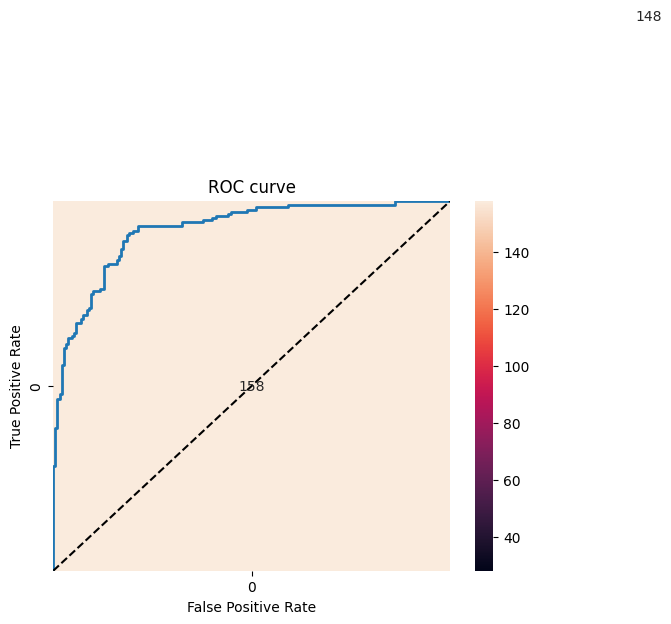

the area under the curve is: 0.9226607833655706


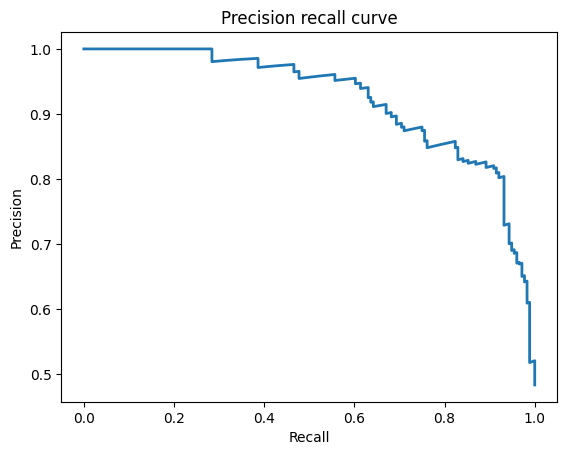

In [31]:
def plot_indicators(best_C, penalty="l2"):


    model = LogisticRegression(
        penalty=penalty, C=best_C, max_iter=1000, solver="liblinear"
    )
    # compute the confusion matrix

    y_pred = cross_val_predict(
        model, alzheimer_df.drop(columns=[target]), y=alzheimer_df[target], cv=5
    )
    conf_mat = confusion_matrix(alzheimer_df[target], y_pred)
    sns.heatmap(conf_mat, annot=True, fmt="g")
    plt.xlabel("predicted")
    plt.ylabel("actual")
    plt.title(" Confusion matrix for the best C")

    # Compute the classification report
    print(classification_report(alzheimer_df[target], y_pred))

    # compute the ROC curves
    y_probas = cross_val_predict(
        model,
        alzheimer_df.drop(columns=[target]),
        y=alzheimer_df[target],
        cv=5,
        method="predict_proba",
    )
    y_scores = y_probas[:, 1]  # score = proba of positive class
    fpr, tpr, _ = roc_curve(alzheimer_df[target], y_scores)
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve")
    plt.show()
    # add the roc auc score
    print("the area under the curve is:", roc_auc_score(alzheimer_df[target], y_scores))
    # compute the precision recall curve

    precisions, recalls, _ = precision_recall_curve(
        alzheimer_df[target], y_scores
    )
    plt.plot(recalls, precisions, linewidth=2)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision recall curve")
    plt.show()
    return best_C, model, fpr, tpr, recalls, precisions


best_C, model, fpr_l2, tpr_l2, recalls_l2, precisions_l2 = plot_indicators(
    best_C, penalty="l2"
)

## Interprétation
 - the area under the roc score is close to 1, meaning that our models is good in prediction.

# Question 12 
Reprendre les questions 9 à 11 en considérant la régression logistique régularisée l1 par rapport à l2


In [33]:
# Set hyperparamets

penalty = "l1"
fold = 5
Cs = np.logspace(-2.3, 2.3, 10)

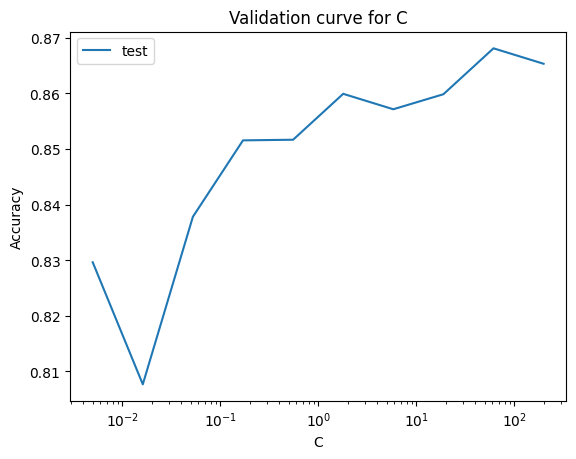

best C: 61.50195042752207
Test accuracy associated with C: 0.8681126331811264


In [34]:
best_C = plot_accuracy_C(Cs, fold, penalty)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       188
           1       0.85      0.87      0.86       176

    accuracy                           0.87       364
   macro avg       0.87      0.87      0.87       364
weighted avg       0.87      0.87      0.87       364



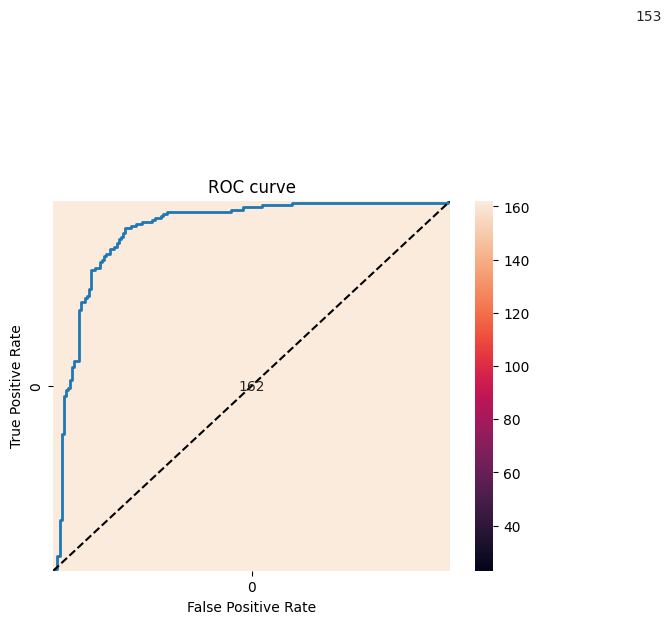

the area under the curve is: 0.9228118955512572


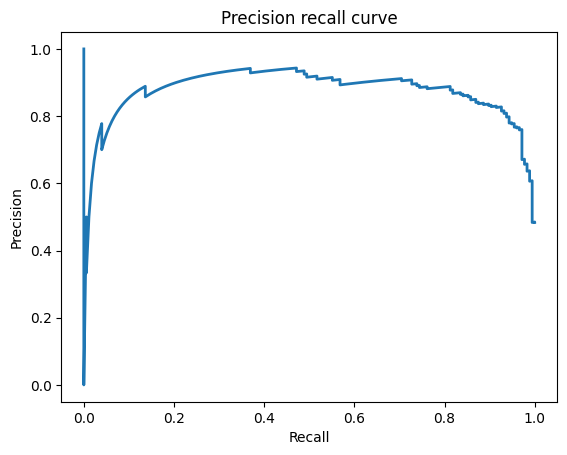

In [35]:
best_C, model, fpr_l1, tpr_l1, recalls_l1, precisions_l1 = plot_indicators(
    best_C, penalty
)

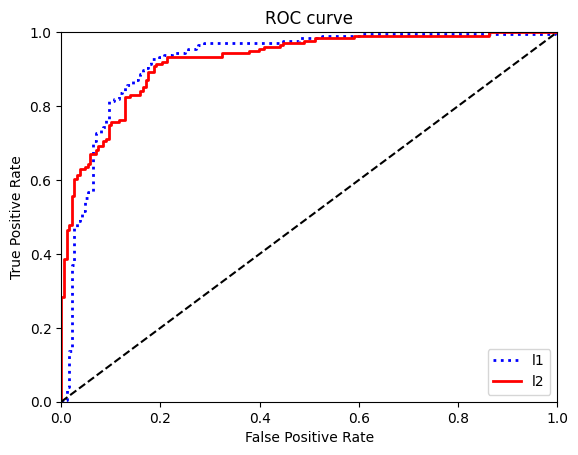

the area for l1 is  0.922
the area for l2 is  0.922


In [36]:
# plot both ROC curve for l1 and l2
plt.plot(fpr_l1, tpr_l1, "b:", linewidth=2, label="l1")
plt.plot(fpr_l2, tpr_l2, "r-", linewidth=2, label="l2")
plt.plot([0, 1], [0, 1], "k--")
plt.axis([0, 1, 0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.legend()
plt.show()
print("the area for l1 is ", 0.922)
print("the area for l2 is ", 0.922)

## Interpretation:
-Even though the ROC Curve of l1 seems visually  better, the area under both curves are quite similar, meaning that they give both same results 
-  As expected by the l1 norm, the model with l1 penalty have less non zero coefficient compared to the l2 one 